**Airbnb Listings - Model Evaluation on Test Data**

# Introduction

## Read in libraries, set notebook preferences, and read in data

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.externals import joblib

In [16]:
#Set options for Pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

#Set stle for plots
plt.style.use('ggplot')

In [17]:
#Set path to model location
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\04_Models'

#Read in trained model
model = joblib.load(path + '/2020_0213_Price_Predictor_Final.sav')

#Check model
print('View Model: \n',model)

View Model: 
 GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False], 

In [18]:
#Read in processed listings data to capture features 
#Set path to data
listings_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Read in listings data
listings = pd.read_csv(listings_path + '/2020_0213_Listings_Processed.csv',
                       dtype= {'review_scores_accuracy':'category', 'review_scores_checkin':'category', 
                                'review_scores_cleanliness':'category','review_scores_communication':'category',
                            'review_scores_location':'category','review_scores_rating':'category',
                            'review_scores_value':'category'},  index_col=0)

In [19]:
#Read in test data and convert to arrays
test_data = pd.read_csv(path +'/2020_0128_Test_Data.csv').values
test_labels = pd.read_csv(path +'/2020_0128_Test_Labels.csv').values


#Check test data shape
print(test_data.shape)
print(test_labels.shape)

(16442, 82)
(16442, 1)


# Deploy

In [20]:
#Fit model to test data
model.fit(test_data, test_labels)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.6s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.1s finished
C:\Users\kishe\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [

# Performance evaluation

In [21]:
#View statistics and best parameters from model
print('Best score from model:',model.best_score_)
print('CV Results \n-----------\nR2: ',np.mean(model.cv_results_['mean_test_r2']))
print('RMSE: ',np.mean(np.sqrt(-1 * (model.cv_results_['mean_test_neg_mean_squared_error']))))
print('MAE: ',np.mean(model.cv_results_['mean_test_neg_mean_absolute_error']))

Best score from model: 0.8803944837601203
CV Results 
-----------
R2:  0.8803944837601203
RMSE:  27.093838416441823
MAE:  -16.397500433904156


In [22]:
#Function to visualize feature importance of model
def feature_importance_viz(cols, ft_importances, feat_count, figsize):
    df = pd.DataFrame(list(zip(cols,ft_importances)), columns = ['Feature', 'Relative_Importance'])
    top50 = df.sort_values(by = 'Relative_Importance', ascending = False).head(feat_count)
    ax = top50.plot(kind = 'barh', x='Feature', figsize=figsize,color = 'green') 
    ax.set_title('Top {} Relative Feature Importances'.format(feat_count))
    ax.invert_yaxis()

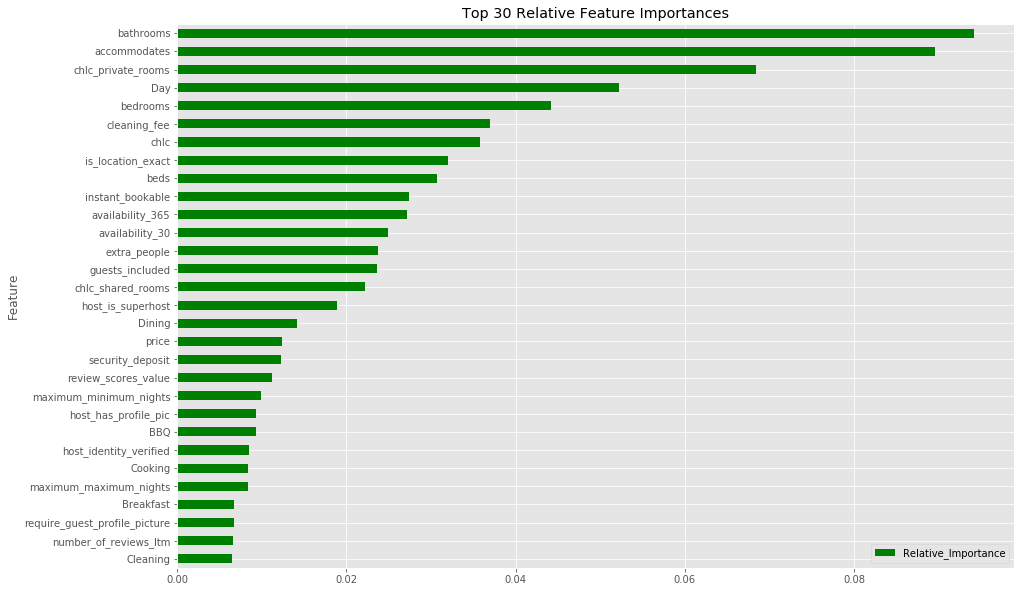

In [24]:
#Visualize ft importance from final model on test data
feature_importance_viz(listings.columns, model.best_estimator_.feature_importances_,30, (15,10))